In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns

In [2]:
number_of_hosts = []  # Declaring a global list, but should ideally not be used globally.
hosts = []
df = None
dataset = []

In [3]:
def set_hostnames(number_of_hosts: int) -> None:
    global hosts
    hostnames_prefix = ['L'] * 40 + ['S'] * 30 + ['A'] * 20 + ['H'] * 10
    entorno = ['D'] * 10 + ['I'] * 10 + ['T'] * 25 + ['S'] * 25 + ['P'] * 30
    pais = ['NOR'] * 6 + ['FRA'] * 9 + ['ITA'] * 16 + ['ESP'] * 16 + ['GER'] * 23 + ['IRL'] * 30
    grupo_alpha = []

    node_counter = {}

    for i in range(number_of_hosts):
        # Generar componentes directamente
        host = random.choice(hostnames_prefix) + random.choice(entorno) + random.choice(pais)
        
        # Incrementar el contador o inicializarlo para la combinación actual
        if host not in node_counter:
            node_counter[host] = 1
        else:
            node_counter[host] += 1

        # Generar número incremental con tres dígitos
        host += str(node_counter[host]).zfill(3)
        hosts.append(host)
        

In [4]:
def get_os(hostname: str) -> str:
    if hostname[0] == 'L':
        return 'Linux'
    elif hostname[0] == 'S':
        return 'Solaris'
    elif hostname[0] == 'A':
        return 'AIX'
    elif hostname[0] == 'H':
        return 'HP-UX'
    else:
        return 'Unknown'

In [5]:
def get_enviroment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknown'
        

In [6]:
def get_country(hostname: str) -> str:
    country_code = hostname[2:5]  # Slice correctly for country code
    if country_code == 'GER':
        return 'Germany'
    elif country_code == 'ITA':
        return 'Italy'
    elif country_code == 'ESP':
        return 'Spain'
    elif country_code == 'IRL':
        return 'Ireland'
    elif country_code == 'NOR':
        return 'Norway'
    elif country_code == 'FRA':
        return 'France'
    else:
        return 'Unknown'

In [7]:
def set_dataframe(count: int) -> None:
    global df,dataset
    set_hostnames(count)

    dataset = []
    
    for hostname in hosts:
        dataset.append({
            'Código': hostname,
            'Hostname': get_os(hostname),
            'Entorno': get_enviroment(hostname),
            'Pais': get_country(hostname),
            'Número': int(hostname[-3:])  # Extraer el número del nodo al final del hostname
        })

    df = pd.DataFrame(dataset)  # Convert dataset to DataFrame



In [8]:
set_dataframe(1500)

In [9]:
print (df.head(10))

     Código Hostname      Entorno     Pais  Número
0  LSGER001    Linux      Staging  Germany       1
1  LSIRL001    Linux      Staging  Ireland       1
2  ATIRL001      AIX      Testing  Ireland       1
3  STNOR001  Solaris      Testing   Norway       1
4  HPNOR001    HP-UX   Production   Norway       1
5  ASESP001      AIX      Staging    Spain       1
6  APFRA001      AIX   Production   France       1
7  LIFRA001    Linux  Integration   France       1
8  LSIRL002    Linux      Staging  Ireland       2
9  LSESP001    Linux      Staging    Spain       1


In [15]:
import os

#Metí una función diferente para el file hosts.cvs porque no aceptaba la ruta de mi file en jupyter.
# Verificar si el directorio existe, si no, crearlo
directory = "Complu/Phy avanzado"

if not os.path.exists(directory):
    os.makedirs(directory)

df.to_csv(f"{directory}/hosts.csv", index=False, header=True)

# Leer el archivo CSV generado y almacenarlo en un nuevo DataFrame
hosts_df = pd.read_csv(f"{directory}/hosts.csv")

print(hosts_df.head(50))

      Código Hostname      Entorno     Pais  Número
0   LSGER001    Linux      Staging  Germany       1
1   LSIRL001    Linux      Staging  Ireland       1
2   ATIRL001      AIX      Testing  Ireland       1
3   STNOR001  Solaris      Testing   Norway       1
4   HPNOR001    HP-UX   Production   Norway       1
5   ASESP001      AIX      Staging    Spain       1
6   APFRA001      AIX   Production   France       1
7   LIFRA001    Linux  Integration   France       1
8   LSIRL002    Linux      Staging  Ireland       2
9   LSESP001    Linux      Staging    Spain       1
10  SPNOR001  Solaris   Production   Norway       1
11  LPIRL001    Linux   Production  Ireland       1
12  HDIRL001    HP-UX  Development  Ireland       1
13  LPIRL002    Linux   Production  Ireland       2
14  LTGER001    Linux      Testing  Germany       1
15  SDIRL001  Solaris  Development  Ireland       1
16  HIITA001    HP-UX  Integration    Italy       1
17  STNOR002  Solaris      Testing   Norway       2
18  SPESP001

In [16]:
h = hosts_df

h_countries_dev = h.groupby(['Pais', 'Entorno']).size()

h_countries_dev

hosts_df = pd.read_csv(f"{directory}/hosts.csv")

print(hosts_df.head(50))

      Código Hostname      Entorno     Pais  Número
0   LSGER001    Linux      Staging  Germany       1
1   LSIRL001    Linux      Staging  Ireland       1
2   ATIRL001      AIX      Testing  Ireland       1
3   STNOR001  Solaris      Testing   Norway       1
4   HPNOR001    HP-UX   Production   Norway       1
5   ASESP001      AIX      Staging    Spain       1
6   APFRA001      AIX   Production   France       1
7   LIFRA001    Linux  Integration   France       1
8   LSIRL002    Linux      Staging  Ireland       2
9   LSESP001    Linux      Staging    Spain       1
10  SPNOR001  Solaris   Production   Norway       1
11  LPIRL001    Linux   Production  Ireland       1
12  HDIRL001    HP-UX  Development  Ireland       1
13  LPIRL002    Linux   Production  Ireland       2
14  LTGER001    Linux      Testing  Germany       1
15  SDIRL001  Solaris  Development  Ireland       1
16  HIITA001    HP-UX  Integration    Italy       1
17  STNOR002  Solaris      Testing   Norway       2
18  SPESP001

In [12]:
h_countries_dev.unstack()

Entorno,Development,Integration,Production,Staging,Testing
Pais,,,,,
France,10,11,43,32,39
Germany,29,36,113,104,56
Ireland,40,44,142,109,108
Italy,27,30,69,67,66
Norway,9,12,26,28,21
Spain,26,20,71,46,66


<Axes: xlabel='Pais'>

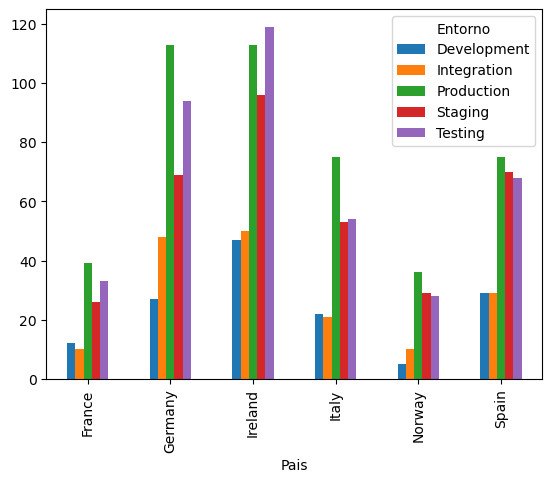

In [17]:
h_countries_dev.unstack().plot(kind = 'bar')

In [18]:
h = hosts_df

h_countries_host = h.groupby(['Hostname','Pais']).size()

h_countries_host




Hostname  Pais   
AIX       France      18
          Germany     69
          Ireland     80
          Italy       43
          Norway      19
          Spain       56
HP-UX     France      19
          Germany     35
          Ireland     43
          Italy       27
          Norway      13
          Spain       27
Linux     France      45
          Germany    137
          Ireland    172
          Italy       93
          Norway      46
          Spain       99
Solaris   France      38
          Germany    110
          Ireland    130
          Italy       62
          Norway      30
          Spain       89
dtype: int64

In [19]:
#Variables para plots

#Plt1
h_countries_host = h.groupby(['Hostname','Pais']).size()
h_countries_host_unstacked = h_countries_host.unstack()

#Plt2
h_hostnames = h.groupby(['Hostname']).size()
num_hosts = h['Hostname'].value_counts()

#Plt3
h_countries_counts = h['Pais'].value_counts()
palette = sns.color_palette("coolwarm", len(h_countries_counts))
plt3 = h_countries_counts.max
print( plt3)

#Plt4
h_dev_countries = h.groupby(['Pais', "Entorno"]).size()
h_dev_countries_unstacked = h_dev_countries.unstack(0)


<bound method Series.max of Pais
Ireland    425
Germany    351
Spain      271
Italy      225
France     120
Norway     108
Name: count, dtype: int64>


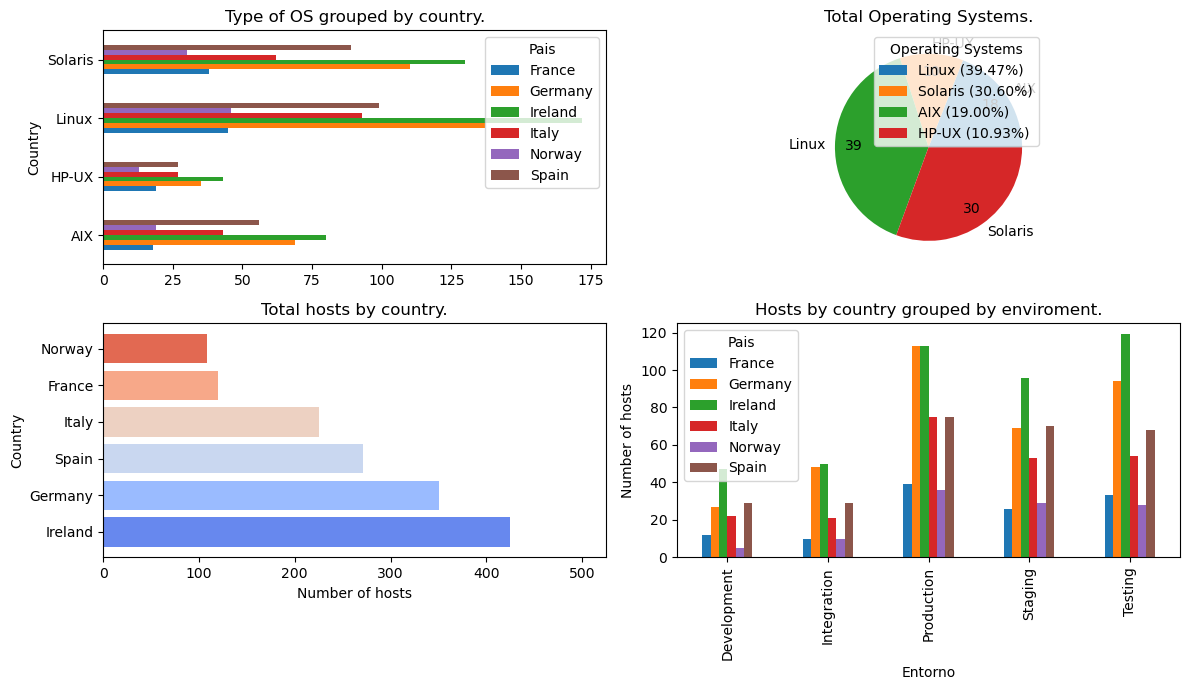

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

#Plt1
h_countries_host = h.groupby(['Hostname','Pais']).size()
h_countries_host_unstacked = h_countries_host.unstack()

h_countries_host_unstacked.plot(kind = 'barh', ax=axes[0,0])

axes[0,0].set_title("Type of OS grouped by country.")
axes[0,0].set_ylabel("Country")

#Plt2
h_hostnames = h.groupby(['Hostname']).size()
num_hosts = h['Hostname'].value_counts()

h_hostnames.plot(kind = 'pie', ax=axes[0,1], autopct='%d', pctdistance=0.8,)

axes[0,1].set_title("Total Operating Systems.")
axes[0, 1].legend(
    labels=[f"{os} ({p:.2f}%)" for os, p in zip(num_hosts.index, 100 * num_hosts / num_hosts.sum())],
    loc="upper right",
    title="Operating Systems"
)

#Plt3
h_countries_counts = h['Pais'].value_counts()
plt3 = h_countries_counts.max()

# Obtener los colores de la paleta de seaborn
palette = sns.color_palette("coolwarm", len(h_countries_counts))

# Crear el gráfico de barras horizontal usando matplotlib pero con la paleta de seaborn
axes[1, 0].barh(h_countries_counts.index, h_countries_counts.values, color=palette)

axes[1, 0].set_title("Total hosts by country.")
axes[1, 0].set_ylabel("Country")
axes[1, 0].set_xlabel("Number of hosts")
axes[1, 0].set_xlim(0, plt3+100)

#Plt4
h_dev_countries = h.groupby(['Pais', "Entorno"]).size()
h_dev_countries_unstacked = h_dev_countries.unstack(0)

h_dev_countries_unstacked.plot(kind = 'bar', ax=axes[1,1])

axes[1,1].set_title("Hosts by country grouped by enviroment.")
axes[1,1].set_ylabel("Number of hosts")
fig.tight_layout()
plt.show()

